## Observations and Insights 

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [28]:
# Combine the data into a single dataset

mouse_df = pd.DataFrame(mouse_metadata, columns=["Mouse ID", "Drug Regimen", "Sex", "Age_months", "Weight(g)"])
mouse_df.head()

study_df = pd.DataFrame(study_results, columns=["Mouse ID", "Timepoint", "Tumor Volume(mm3)", "Metastatic Sites"])
study_df.head()

# Display the data table for preview
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer") 
combined_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [29]:
# Checking the number of mice.

mice_count = combined_data["Mouse ID"].count()
mice_count


1893

In [30]:
# Get duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [31]:
# Optional: Get all the data for the duplicate mice id

all_dupe_mice = combined_data[combined_data.duplicated(['Mouse ID',])]
all_dupe_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [32]:
# Create a clean DataFrame by dropping the duplicate mice by ID

clean_mice_data = combined_data.drop_duplicates("Mouse ID")
clean_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [33]:
# Checking the number of mice in the clean DataFrame

clean_mice_count = clean_mice_data["Mouse ID"].count()
clean_mice_count


249

## Summary Statistics

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

average_tumor_vol = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
average_tumor_vol

median_tumor_vol = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
median_tumor_vol

std_tumor_vol = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
std_tumor_vol

variance_tumor_vol = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
variance_tumor_vol

sem_tumor_vol = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
sem_tumor_vol


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_df = pd.DataFrame({"Mean": average_tumor_vol, "Median": median_tumor_vol, "Variance": variance_tumor_vol, "Standard Deviation": std_tumor_vol, "SEM": sem_tumor_vol})
summary_df

# Using the aggregation method, produce the same summary statistics in a single line




,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

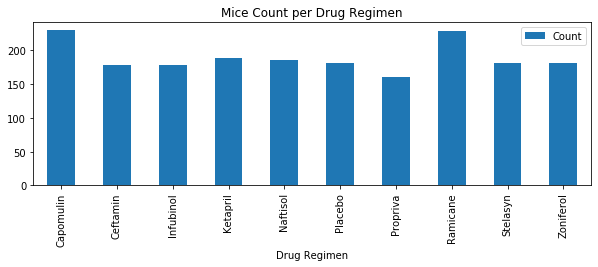

In [36]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

mice_regimen = pd.DataFrame(combined_data.groupby(["Drug Regimen"]).count()).reset_index()

regimen_data = mice_regimen[["Drug Regimen", "Mouse ID"]]
regimen_data = regimen_data.rename(columns={"Mouse ID": "Count"})
regimen_data = regimen_data.set_index("Drug Regimen")
regimen_data.plot(kind="bar", figsize=(10,3))
plt.title("Mice Count per Drug Regimen")
plt.show()


<BarContainer object of 10 artists>

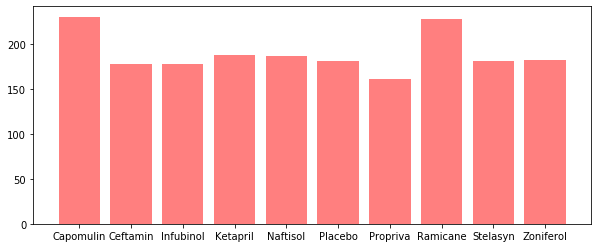

In [37]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# Convert Column to List
treatment_regimen = summary_df.index.tolist()
treatment_regimen

# Convert Regimen
regimen_counts= (combined_data.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
regimen_counts

x_axis = np.arange(len(regimen_counts))
x_axis = treatment_regimen

# Customize Bar Chart
plt.figure(figsize=(10,4))
plt.bar(x_axis, regimen_counts, color='r', alpha=0.5, align="center")

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Start with a DataFrame
gender_data = pd.DataFrame(combined_data.groupby(["Sex"]).count()).reset_index()
gender_data

# Narrow DataFrame down to necessary data
gender_data = gender_data[["Sex", "Mouse ID"]]
gender_data


,Sex,Mouse ID
0,Female,935
1,Male,958


Text(0, 0.5, '')

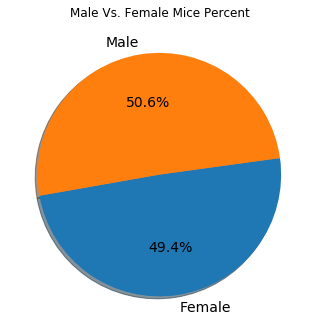

In [39]:
plt.figure(figsize=(12,6))
ax1 = plt.subplot(121, aspect="equal")
gender_data.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%',
              startangle=190, shadow=True, labels=gender_data["Sex"], legend = False, fontsize=14)

plt.title("Male Vs. Female Mice Percent")
plt.xlabel("")
plt.ylabel("")

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

number_gender = (combined_data.groupby(["Sex"])["Age_months"].count()).tolist()
number_gender

[935, 958]

(-1.168554778187085,
 1.1046347624021708,
 -1.2267182048220846,
 1.1096662105117718)

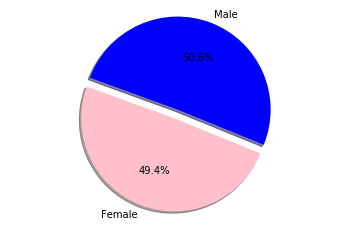

In [41]:
labels = ["Female", "Male"]
colors = ["pink", "blue"]
explode = (0.1, 0)

plt.pie(number_gender, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# # Capomulin, Ramicane, Infubinol, and Ceftamin
# combined_data.head()

# # Start by getting the last (greatest) timepoint for each mouse
# timepoint_data = combined_data.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
# last_timepoint = timepoint_data.loc[timepoint_data["Timepoint"] == 45]
# last_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [44]:
# Create a list of the four drugs to examine
focus_drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Slice the original combined_data dataframe using the list of four drugs
focus_drugs = combined_data[combined_data['Drug Regimen'].isin(focus_drug_list)]
focus_drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [45]:
timepoint_data = combined_data.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
last_timepoint = timepoint_data.loc[timepoint_data["Timepoint"] == 45]
last_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
309,b128,Capomulin,Female,9,22,45,38.982878,2
299,b742,Capomulin,Male,7,21,45,38.939633,0
244,g288,Capomulin,Male,3,19,45,37.074024,1
360,g316,Capomulin,Female,22,22,45,40.159220,2
440,i557,Capomulin,Female,1,24,45,47.685963,1
...,...,...,...,...,...,...,...,...
1344,p136,Zoniferol,Female,5,28,45,63.488697,2
1416,q511,Zoniferol,Female,2,28,45,68.611061,3
1434,q633,Zoniferol,Male,12,25,45,70.827796,2
1518,s337,Zoniferol,Male,14,27,45,62.109651,4


In [46]:
# Then groupby 'Mouse ID' and use the .agg method
last_tumor = focus_drugs.groupby(['Drug Regimen','Mouse ID']).agg(\
      # Get last value of the 'Tumor Volume (mm3)' using lambda function selecting the element in -1 position
       Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(2)
last_tumor

Last_tumor_size
Drug Regimen Mouse ID                 
Capomulin    b128                38.98
             b742                38.94
             f966                30.49
             g288                37.07
             g316                40.16
...                                ...
Ramicane     s508                30.28
             u196                40.67
             w678                43.17
             y449                44.18
             z578                30.64

[100 rows x 1 columns]

In [47]:
# Reconfigure dataframe with Drug Regimen as columns by using unstack
last_tumor_unstack = last_tumor.stack(level=0).unstack(level=0)
last_tumor_unstack.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,Last_tumor_size,NaN,NaN,67.97,NaN
a251,Last_tumor_size,NaN,NaN,65.53,NaN
a275,Last_tumor_size,NaN,63.0,NaN,NaN
a411,Last_tumor_size,NaN,NaN,NaN,38.41
a444,Last_tumor_size,NaN,NaN,NaN,43.05


In [48]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.

# Set counter to 0 which is used to only print dividing line at top of output
counter = 0

# Quartile Calculations
for drug in focus_drug_list:
    quartiles = last_tumor_unstack[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    # Check if it is the first time through the for loop, if so then print dividing line at top only
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.13 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.17 
Values below 36.83 for Infubinol could be outliers.


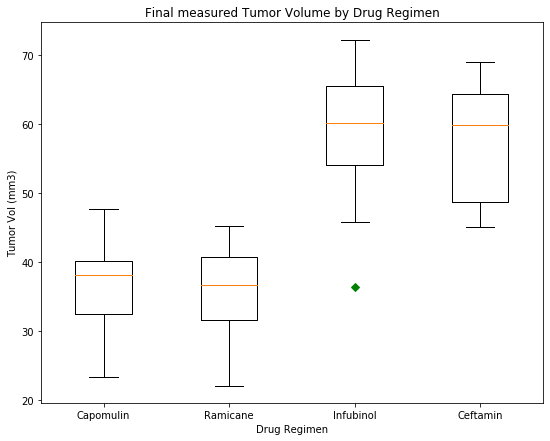

In [52]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_list = []

# Loop through drug list using them to select the same column names
# and appending to the boxplot_list
for drug in focus_drug_list:
    boxplot_list.append(list(last_tumor_unstack[drug].dropna()))

# Plot on boxplot
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor Volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(boxplot_list,notch=0,sym='gD')
plt.xticks([1,2,3,4],focus_drug_list)

plt.show()


## Line and Scatter Plots

In [53]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Make a new DataFrame
capomulin_regimen = combined_data.loc[combined_data["Drug Regimen"] == 'Capomulin']
capomulin_regimen

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


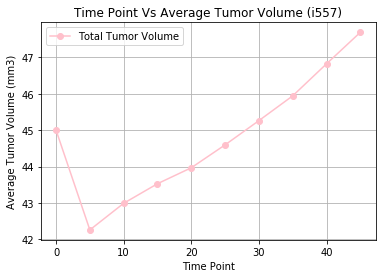

In [54]:
capomulin_mouse = combined_data[(combined_data["Drug Regimen"] == "Capomulin") & (combined_data["Mouse ID"] == "i557")]
capomulin_mouse = capomulin_mouse.groupby(["Drug Regimen", "Timepoint"])
capomulin_mouse_df = capomulin_mouse["Tumor Volume (mm3)"].mean().to_frame()
tumor_index = capomulin_mouse_df.unstack(0)
tumor_df = tumor_index["Tumor Volume (mm3)"]

xAxis = [0,5,10,15,20,25,30,35,40,45]
plt.figure()
tumor_total, = plt.plot(xAxis, tumor_df["Capomulin"], marker= "o", color="pink", label="Total Tumor Volume" )
plt.legend(handles=[tumor_total], loc="best")
plt.title("Time Point Vs Average Tumor Volume (i557)")
# plt.xlim(-10, 50)
# plt.ylim(30, 50)
plt.xlabel("Time Point")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

In [55]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Create a new DataFrame
capomulin_weight = combined_data[(combined_data["Drug Regimen"] == "Capomulin")]
capomulin_weight = capomulin_weight[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
weight_data = capomulin_weight.groupby(["Mouse ID","Weight (g)"])
capomulin_weight_df = weight_data["Tumor Volume (mm3)"].mean().to_frame()
capomulin_weight_df = capomulin_weight_df.reset_index()
capomulin_weight_df


,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


<Figure size 432x288 with 0 Axes>

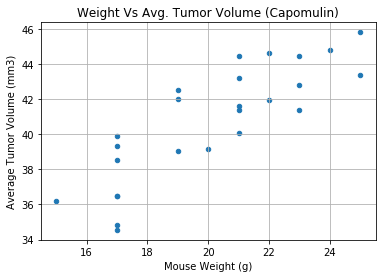

In [59]:
# Create Scatter Plot

plt.figure()
capomulin_weight_df.plot(x="Weight (g)", y="Tumor Volume (mm3)", kind = "scatter", marker="o")

plt.title("Weight Vs Avg. Tumor Volume (Capomulin)")
# plt.xlim(10, 25)
# plt.ylim(30, 50)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [66]:
# Use Pearson r to calculate correlation coefficient
correlation = st.pearsonr(capomulin_weight_df["Weight (g)"], capomulin_weight_df["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


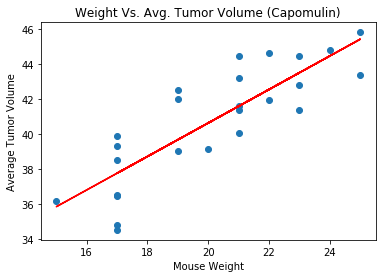

In [69]:
x_values = capomulin_weight_df['Weight (g)']
y_values = capomulin_weight_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.title("Weight Vs. Avg. Tumor Volume (Capomulin)")
plt.show()